In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('HCLTECH.csv')
TempData.head(30)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.00,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.00,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.00,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.30,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.00,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
5,2000-01-18,HCLTECH,EQ,1801.65,1730.55,1815.00,1657.55,1775.00,1774.50,1716.39,359900,6.177280e+13,NaN,NaN,NaN
6,2000-01-19,HCLTECH,EQ,1774.50,1815.00,1889.00,1760.00,1842.80,1851.15,1842.81,316050,5.824204e+13,NaN,NaN,NaN
7,2000-01-20,HCLTECH,EQ,1851.15,1865.00,1865.00,1750.00,1753.50,1757.85,1801.37,204700,3.687409e+13,NaN,NaN,NaN
8,2000-01-21,HCLTECH,EQ,1757.85,1761.00,1815.00,1705.00,1786.00,1781.35,1774.01,282150,5.005360e+13,NaN,NaN,NaN
9,2000-01-24,HCLTECH,EQ,1781.35,1834.90,1923.90,1795.00,1923.90,1923.90,1875.34,328650,6.163317e+13,NaN,NaN,NaN


In [2]:
HCLTechStockData = TempData.dropna()


HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)
  
HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-2']
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

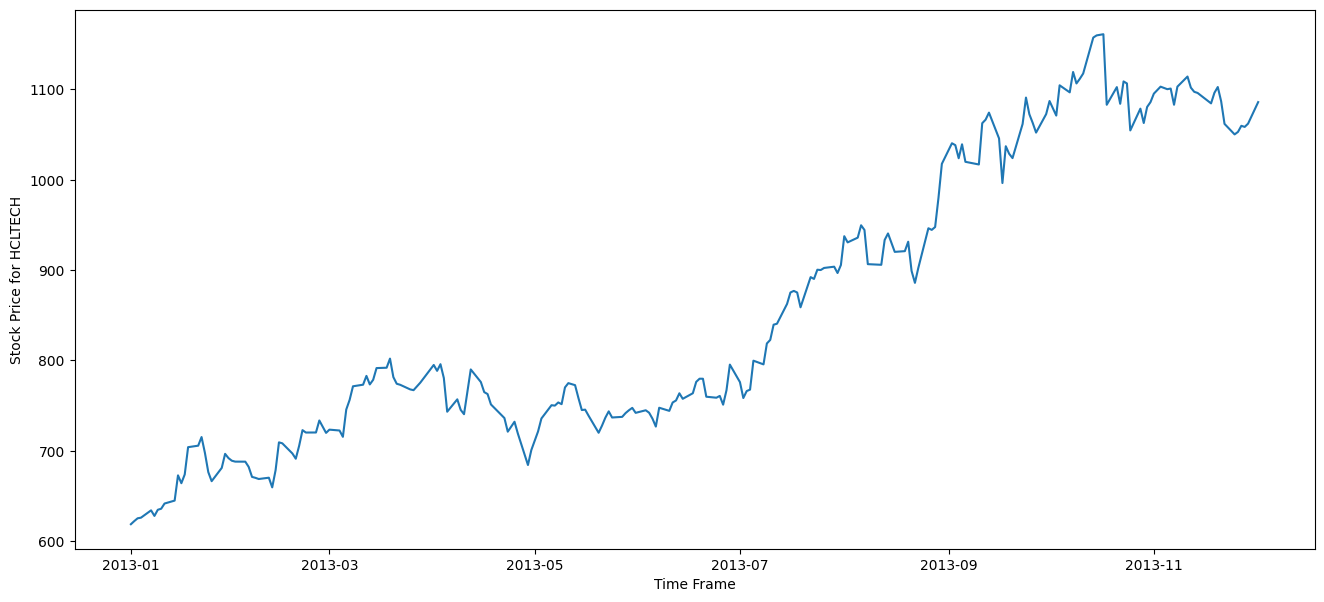

In [3]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

In [4]:
rolLmean = HCLTechStockData.rolling(12).mean()
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

<Figure size 1600x700 with 0 Axes>

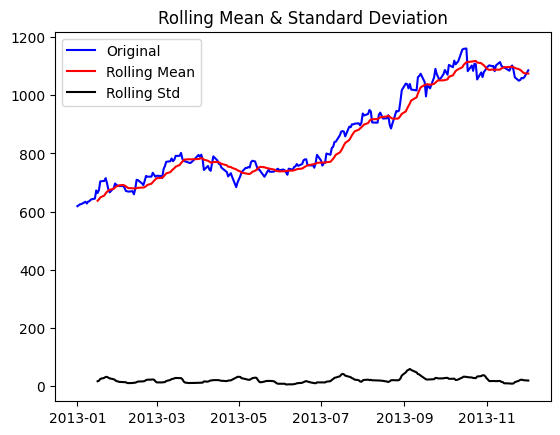

In [5]:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

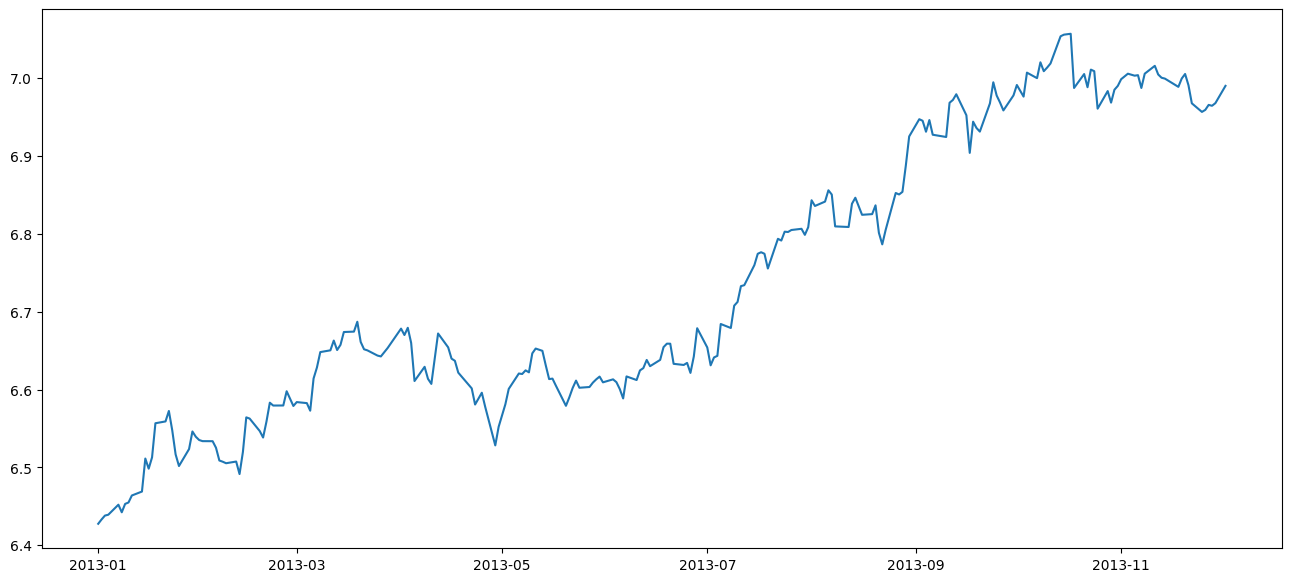

In [6]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

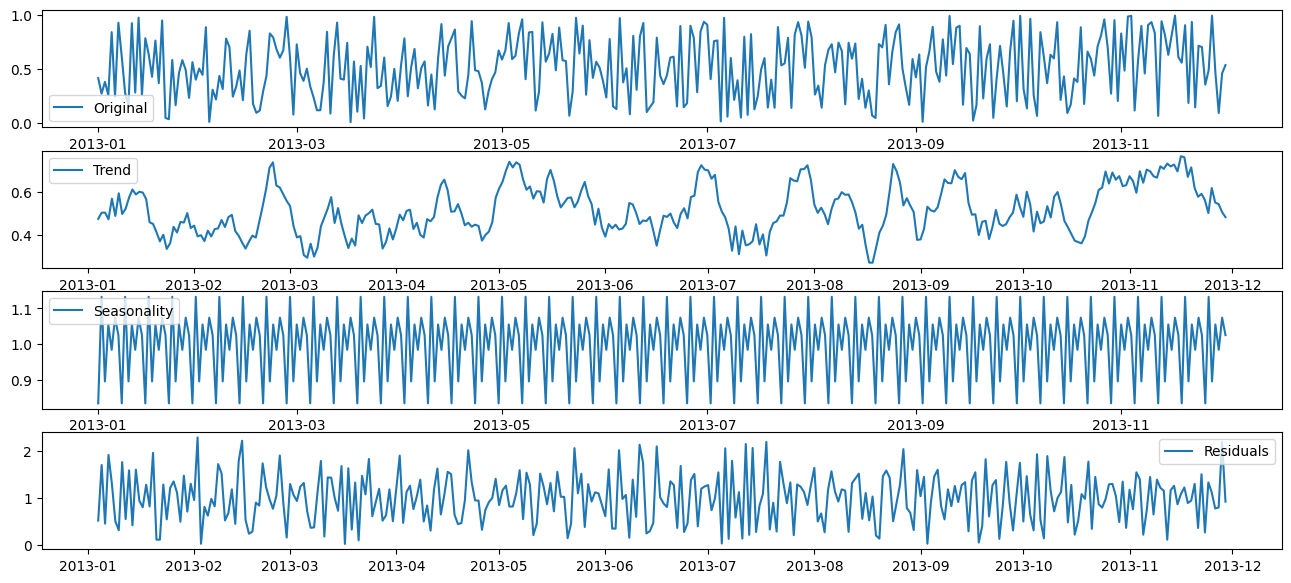

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

start_date = '2013-01-01'
end_date = '2013-12-02'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')

ts_log = pd.Series(data=np.random.rand(len(date_range)), index=date_range)

ts_log.index.freq = ts_log.index.inferred_freq

decomposition = seasonal_decompose(ts_log,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

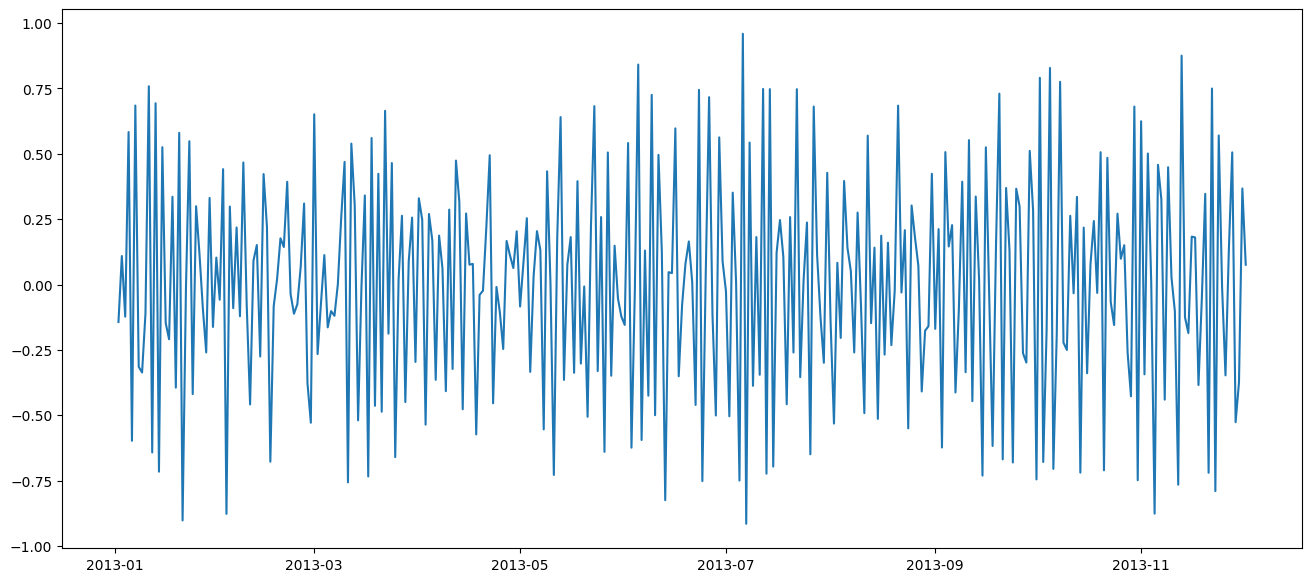

In [11]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()

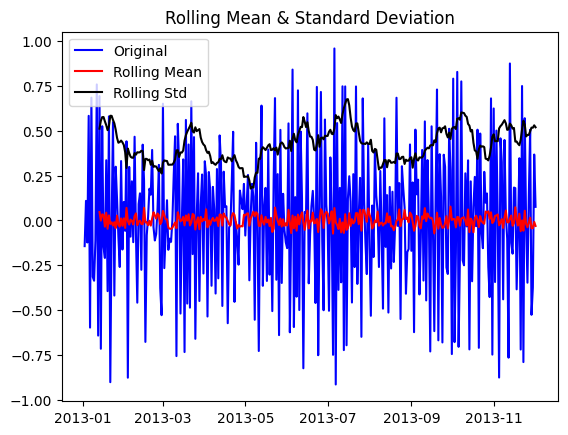

In [12]:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [13]:
HCLTechStockData.sort_index(inplace= True)

In [14]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

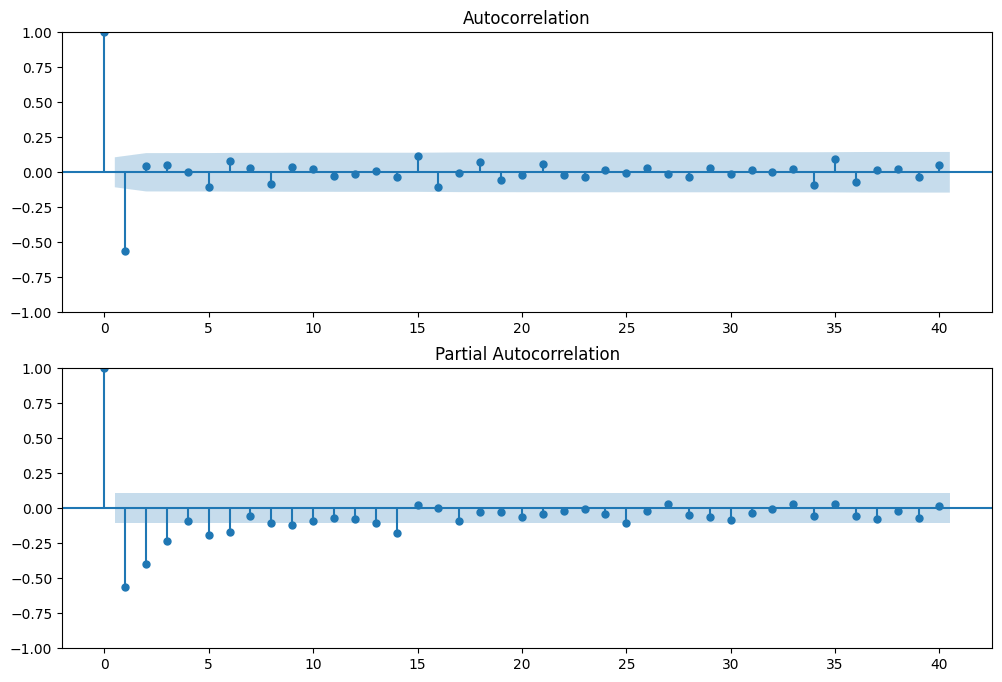

In [15]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
type(ts_log_diff)

pandas.core.series.Series

In [22]:
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

c:\Users\developer14\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


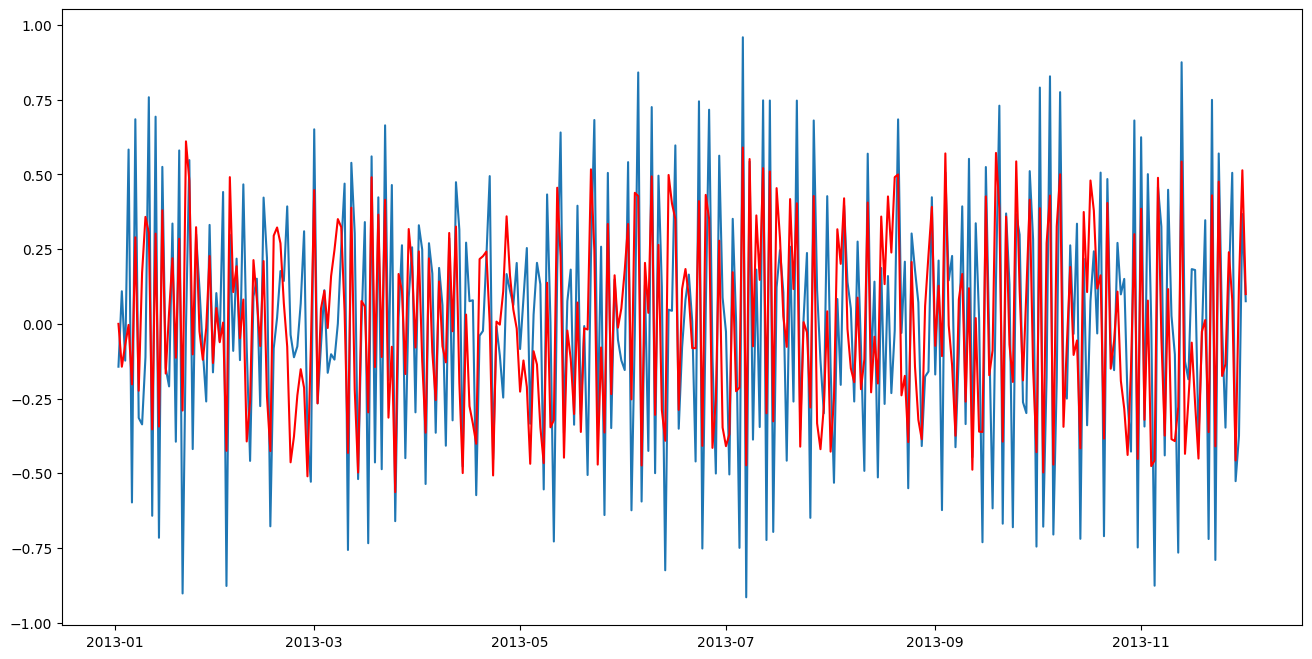

In [23]:
plt.figure(figsize=(16,8))
model = ARIMA(ts_log_diff, order=(2,1,2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [24]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

2013-01-02    0.000000
2013-01-03   -0.143369
2013-01-04   -0.069821
2013-01-05   -0.003527
2013-01-06   -0.202413
Freq: D, dtype: float64


In [25]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

2013-01-02    0.000000
2013-01-03   -0.143369
2013-01-04   -0.213190
2013-01-05   -0.216717
2013-01-06   -0.419130
Freq: D, dtype: float64


In [26]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

2013-01-01    0.412337
2013-01-02    0.412337
2013-01-03    0.268968
2013-01-04    0.199147
2013-01-05    0.195620
Freq: D, dtype: float64

Text(0.5, 1.0, 'RMSE: nan')

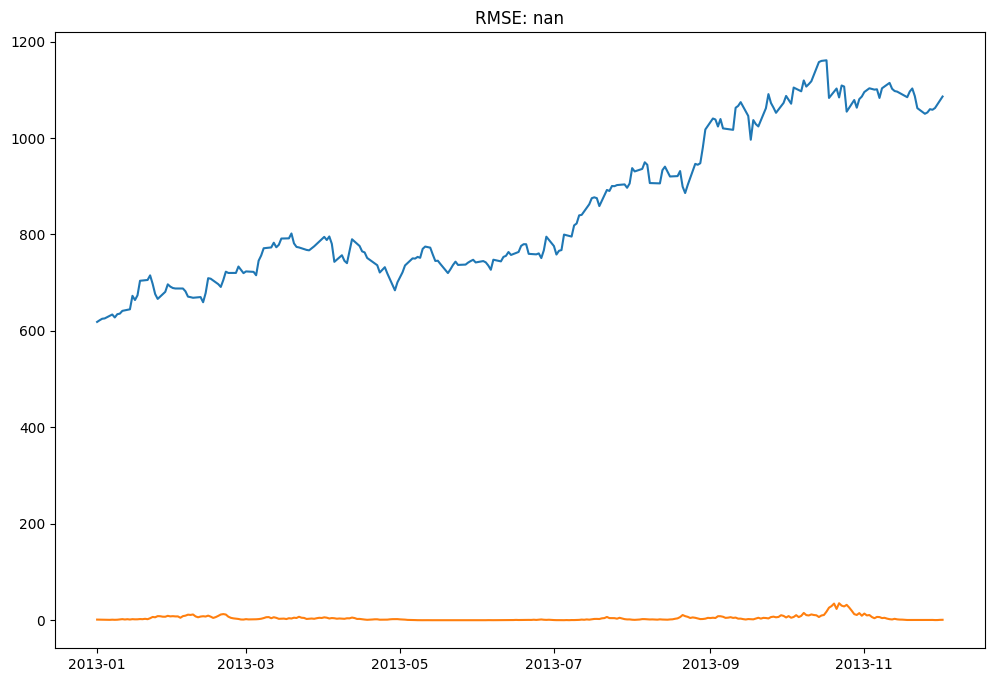

In [27]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(HCLTechStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData)))

In [28]:
results_ARIMA.predict(10,20)

2013-01-12   -0.353036
2013-01-13    0.301928
2013-01-14   -0.343540
2013-01-15    0.380064
2013-01-16   -0.166179
2013-01-17    0.039214
2013-01-18    0.219522
2013-01-19   -0.113307
2013-01-20    0.284771
2013-01-21   -0.290010
2013-01-22    0.610718
Freq: D, Name: predicted_mean, dtype: float64

In [30]:
pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------ --------------------- 1.3/2.8 MB 8.4 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [32]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=105.562, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=108.518, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108.488, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=108.712, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=597.116, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=104.209, Time=0.45 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=109.411, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=102.352, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=108.984, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=109.774, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=104.196, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=110.222, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=109.746, Time=0.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=7.46 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Tota

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)